# The Sparks Foundation: Data Science and Business Analytics Tasks


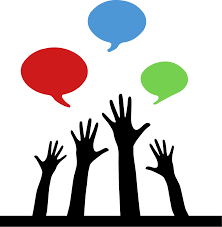

### Task 1: Prediction Using Supervised ML

Target: From the Given Dataset, predict score if a student studies for 9.25hrs/day

## Author : Mohamed Sherif El-Boraie 

.

### Imported Libraries

In [1]:
# Import the necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , confusion_matrix
from sklearn.model_selection import train_test_split

# Import the matplotlib and seaborn libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Load the dataset and displaying the inputs Data

In [2]:
# Load the dataset from the URL
data_URL = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(data_URL)

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Get the inputs and targets
inputs = df['Hours'].values
targets = df['Scores'].values
# Reshape the inputs and targets arrays to match the expected format
inputs = inputs.reshape(-1, 1)
targets = targets.reshape(-1, 1)

##### As shown, dataset is small and there is no null values, so we step on to visualizing data process

### Data Visualization

In [7]:
# Calculate the correlation coefficient between the inputs and targets
df['Hours'].corr(df['Scores'])

0.9761906560220887

Text(0.5, 1.0, 'Confusion Matrix for Dataset')

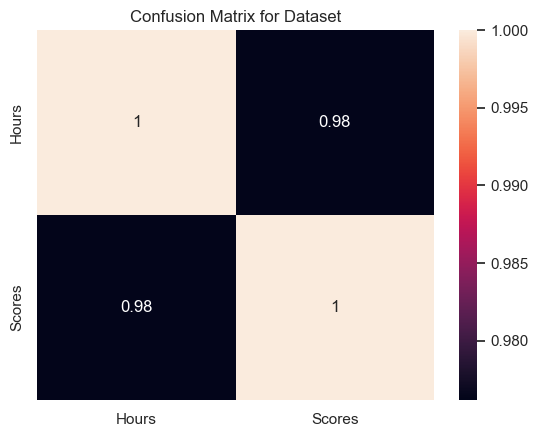

In [8]:
# Calculate the correlation matrix and plot it as a heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Confusion Matrix for Dataset')

In [9]:
x = inputs
y = targets

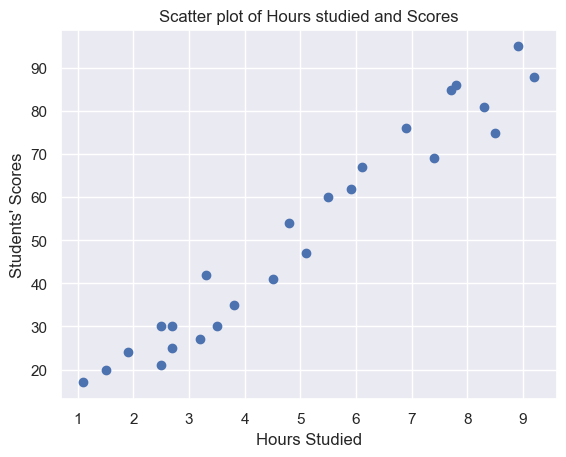

In [10]:
# Scatter plot of Hours studied vs Scores
# Plot the scatter plot of the inputs and targets
plt.scatter(x, y)
# Add a title and labels to the plot
plt.title('Scatter plot of Hours studied and Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Students\' Scores')

# Show the plot
plt.show()

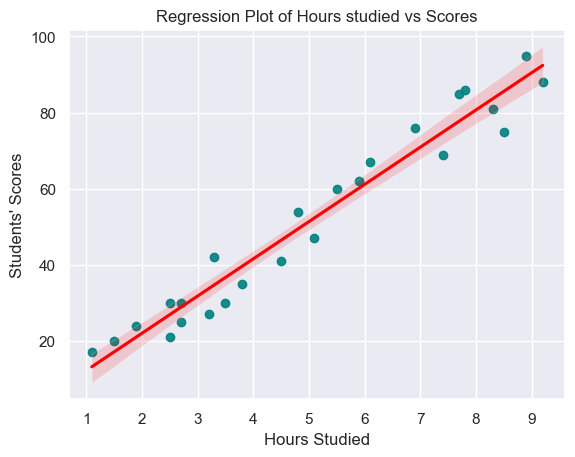

In [11]:
# Regression Plot of Hours studied vs Scores
sns.regplot(x=x, y=y, color='red', scatter_kws={'color': 'Teal', 'alpha': 0.9} )

plt.title('Regression Plot of Hours studied vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Students\' Scores')
plt.show()

### Train Test Split

In [12]:
# Split the dataset into training and testing sets
x_train, x_test , y_train , y_test = train_test_split(inputs, targets, test_size=0.2, random_state= 365)

In [13]:
# Create a linear regression model and fit it to the training data
lin = LinearRegression()
lin.fit(x_train, y_train)

LinearRegression()

In [14]:
# Calculate the accuracy of the model on the training data
lin.score(x_train,y_train)

0.9503964594693615

In [15]:
# Predict the targets for the test data
y_predict = lin.predict(x_test)

In [16]:
# Create a DataFrame of the actual and predicted targets
Prediction_data =pd.DataFrame({'Actual values':y_test.ravel(),'Predicted Values':y_predict.ravel()})
Prediction_data

,Actual values,Predicted Values
0,35,39.259780
1,24,20.340334
2,76,70.128349
3,69,75.107151
4,17,12.374251


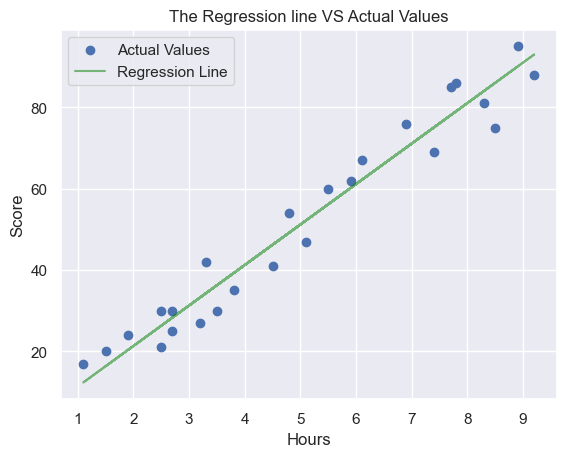

In [17]:
# Plot the scatter plot and regression line
plt.scatter(x,y)
plt.plot( x, lin.predict(x) , alpha =0.5 , c='green' )
plt.legend(('Actual Values','Regression Line'))
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('The Regression line VS Actual Values');

### Model Evaluation 

In [18]:
# Calculate the mean absolute error (MAE) of the model
print('Mean Absolute Error:',mean_absolute_error(y_test,y_predict))

Mean Absolute Error: 4.904799258483659


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [19]:
Student_Pred = lin.predict([[9.25]])
print("Score = {:.3f}".format(float(Student_Pred[0])))

Score = 93.529


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.